In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score


# ATTRIBUTE INFORMATION

Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink
Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral/dissatisfaction)

In [136]:
pwd

'C:\\Users\\shiva'

In [137]:
df = pd.read_csv('C:/Users/shiva/Downloads/airline passenger satisfaction/test.csv')

In [138]:
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [139]:
plt.rcParams['figure.figsize'] = [15,8]

In [140]:
#first five observations
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [141]:
#last five observations
df.tail()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied
25975,25975,34799,Female,Loyal Customer,42,Personal Travel,Eco,264,2,5,...,1,1,2,1,1,1,1,0,0.0,neutral or dissatisfied


In [142]:
df.shape

(25976, 25)

In [143]:
df.count()

Unnamed: 0                           25976
id                                   25976
Gender                               25976
Customer Type                        25976
Age                                  25976
Type of Travel                       25976
Class                                25976
Flight Distance                      25976
Inflight wifi service                25976
Departure/Arrival time convenient    25976
Ease of Online booking               25976
Gate location                        25976
Food and drink                       25976
Online boarding                      25976
Seat comfort                         25976
Inflight entertainment               25976
On-board service                     25976
Leg room service                     25976
Baggage handling                     25976
Checkin service                      25976
Inflight service                     25976
Cleanliness                          25976
Departure Delay in Minutes           25976
Arrival Del

In [144]:
df.info

<bound method DataFrame.info of        Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
0               0  19556  Female     Loyal Customer   52  Business travel   
1               1  90035  Female     Loyal Customer   36  Business travel   
2               2  12360    Male  disloyal Customer   20  Business travel   
3               3  77959    Male     Loyal Customer   44  Business travel   
4               4  36875  Female     Loyal Customer   49  Business travel   
...           ...    ...     ...                ...  ...              ...   
25971       25971  78463    Male  disloyal Customer   34  Business travel   
25972       25972  71167    Male     Loyal Customer   23  Business travel   
25973       25973  37675  Female     Loyal Customer   17  Personal Travel   
25974       25974  90086    Male     Loyal Customer   14  Business travel   
25975       25975  34799  Female     Loyal Customer   42  Personal Travel   

          Class  Flight Distance  Inflight 

In [145]:
df.duplicated() #checking for duplicates in dataset

0        False
1        False
2        False
3        False
4        False
         ...  
25971    False
25972    False
25973    False
25974    False
25975    False
Length: 25976, dtype: bool

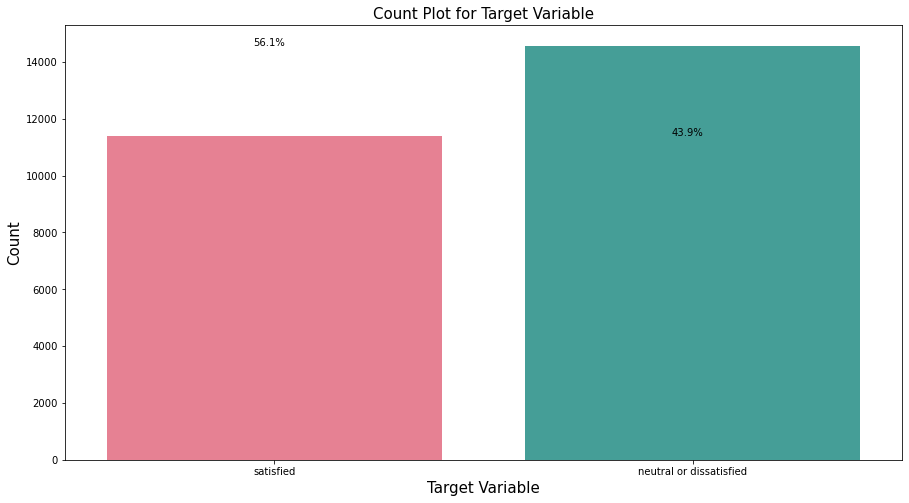

In [146]:
df_target = df['satisfaction']
df_target.value_counts()
sns.countplot(x = df_target,palette='husl')
plt.text(x = 0.95, y = df_target.value_counts()[1] + 1, s = str(round((df_target.value_counts()[1])*100/len(df_target),2)) + '%')
plt.text(x = -0.05, y = df_target.value_counts()[0] +1, s = str(round((df_target.value_counts()[0])*100/len(df_target),2)) + '%')
plt.title('Count Plot for Target Variable', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

#Above plot shows a distribution of around 56%:44% between neutral/dissatisfied passengers and satisfied passengers respectively. So the data is quite balanced and it does not require any special treatment.

# EDA

In [147]:
#Number of attribute and observation
print('Number of Observation:',df.shape[0])

print('Number of feature:',df.shape[1])

Number of Observation: 25976
Number of feature: 25


In [148]:
# Checking are datatype of the attribute
df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

All the datatypes are correct identified

In [149]:
#describe function
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,12987.500000,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,7498.769632,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,0.000000,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,6493.750000,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,12987.500000,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,19481.250000,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,25975.000000,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


# Missing value handle

In [150]:
# Finding Missing Value in the Dataset
df_total = df.isnull().sum().sort_values(ascending=False)

# Percentage of missing value in the dataset
percentage = (((df.isnull().sum()/df.shape[0]))*100).sort_values(ascending=False)

# Table
table = pd.concat([df_total,percentage],keys=['Total','Percentage'],axis=1)
table

,Total,Percentage
Arrival Delay in Minutes,83,0.319526
satisfaction,0,0.000000
Gate location,0,0.000000
id,0,0.000000
Gender,0,0.000000
Customer Type,0,0.000000
Age,0,0.000000
Type of Travel,0,0.000000
Class,0,0.000000
Flight Distance,0,0.000000


Arival Delay in Minutes has missing of 0.3% and all the other variable doesnt have missing value.

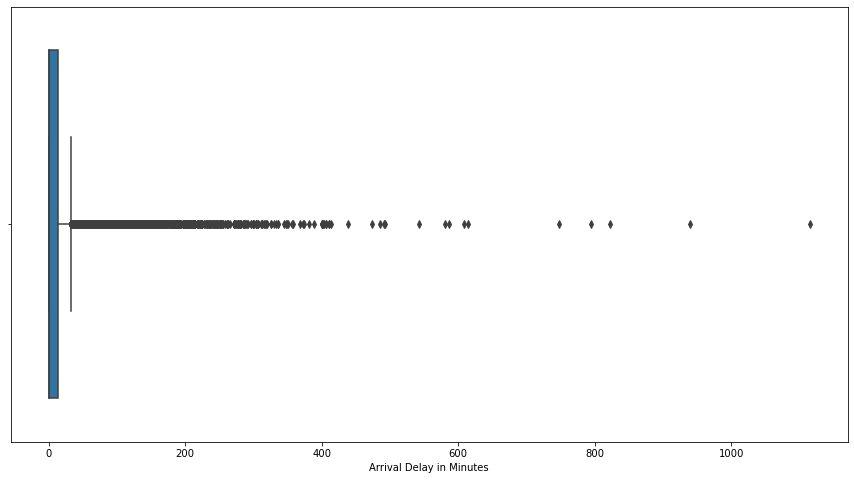

In [151]:
sns.boxplot(df['Arrival Delay in Minutes'])

In [152]:
#Checking for the median
df['Arrival Delay in Minutes'].median()

0.0

In [153]:
# Replace the missing the value with median as there are outliers
df['Arrival Delay in Minutes'].replace(np.NaN,0,inplace=True)

In [154]:
df_total = df.isnull().sum().sort_values(ascending=False)

# Percentage of missing value in the dataset
percentage = (((df.isnull().sum()/df.shape[0]))*100).sort_values(ascending=False)

# Table
table = pd.concat([df_total,percentage],keys=['Total','Percentage'],axis=1)
table

,Total,Percentage
satisfaction,0,0.0
Gate location,0,0.0
id,0,0.0
Gender,0,0.0
Customer Type,0,0.0
Age,0,0.0
Type of Travel,0,0.0
Class,0,0.0
Flight Distance,0,0.0
Inflight wifi service,0,0.0


no missing values in dataset

In [155]:
#Making a copy of the Dataset
df_sat =df.copy()


# Removing Insigificant Variable

In [156]:
# Removing the id column as it irrelvant
df_sat.drop(['id'],axis=1,inplace=True)

In [157]:
# Standard Deivation 
df_sat.std()

Unnamed: 0                           7498.769632
Age                                    15.135685
Flight Distance                       998.683999
Inflight wifi service                   1.335384
Departure/Arrival time convenient       1.533371
Ease of Online booking                  1.412951
Gate location                           1.282133
Food and drink                          1.331506
Online boarding                         1.355536
Seat comfort                            1.320090
Inflight entertainment                  1.338299
On-board service                        1.282088
Leg room service                        1.318862
Baggage handling                        1.176525
Checkin service                         1.269332
Inflight service                        1.180681
Cleanliness                             1.319330
Departure Delay in Minutes             37.423160
Arrival Delay in Minutes               37.466787
dtype: float64

None of the Attribute has Standard Deviation 0 we cant remove them.

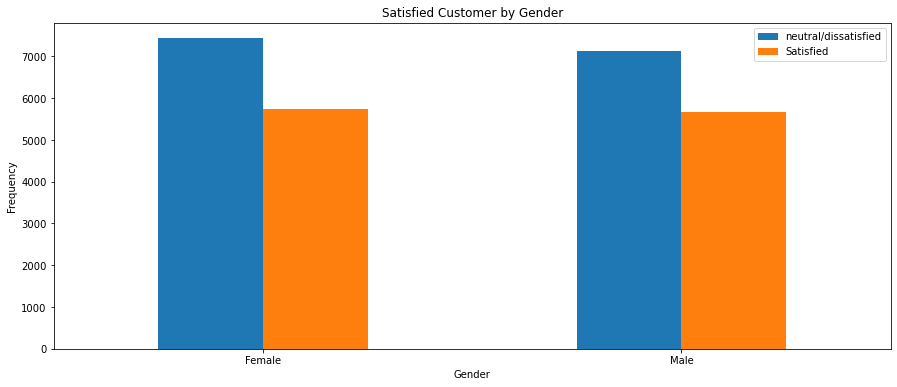

In [158]:
pd.crosstab(df_sat.Gender,df_sat.satisfaction).plot(kind="bar",figsize=(15,6))
plt.title('Satisfied Customer by Gender')
plt.xticks(rotation=0)
plt.legend(['neutral/dissatisfied', 'Satisfied'])
plt.ylabel('Frequency')
plt.show()

Gender-wise distribution of dissatisfied and satisfied customers are quite same.In both the case male and female the dissatisfied customers are more than satisfied customer.


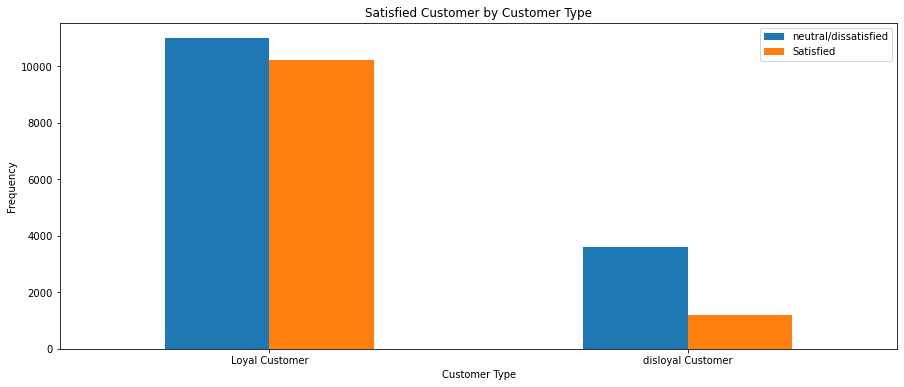

In [159]:
pd.crosstab(df_sat['Customer Type'],df_sat.satisfaction).plot(kind="bar",figsize=(15,6))
plt.title('Satisfied Customer by Customer Type')
plt.xticks(rotation=0)
plt.legend(['neutral/dissatisfied', 'Satisfied'])
plt.ylabel('Frequency')
plt.show()

Loyal Customer are more in number even tho count of satisfied and dissatisfied customer is same in Loyal Customer.

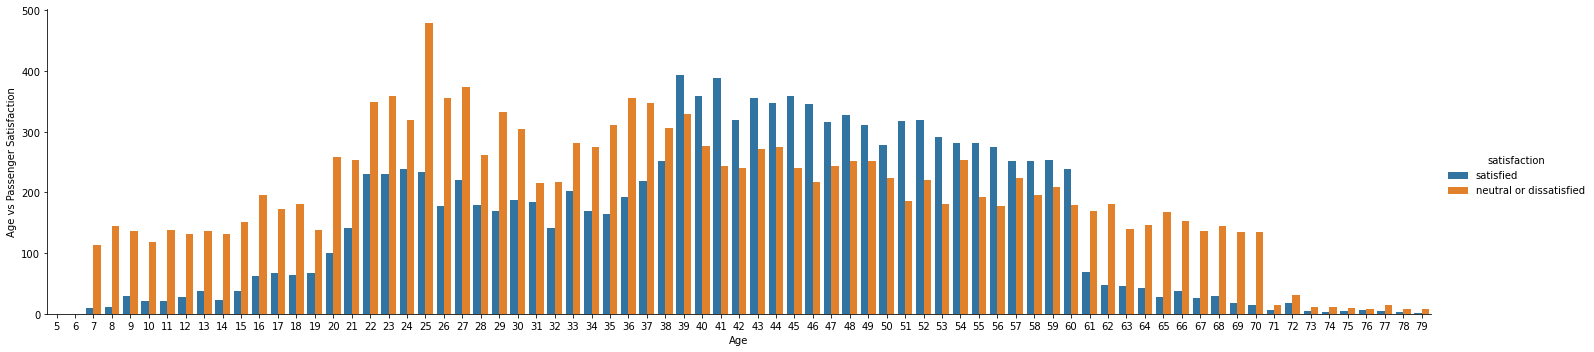

In [160]:
g = sns.catplot("Age", data=df_sat, aspect=4.0, kind='count', hue='satisfaction', order=range(5, 80))
g.set_ylabels('Age vs Passenger Satisfaction')

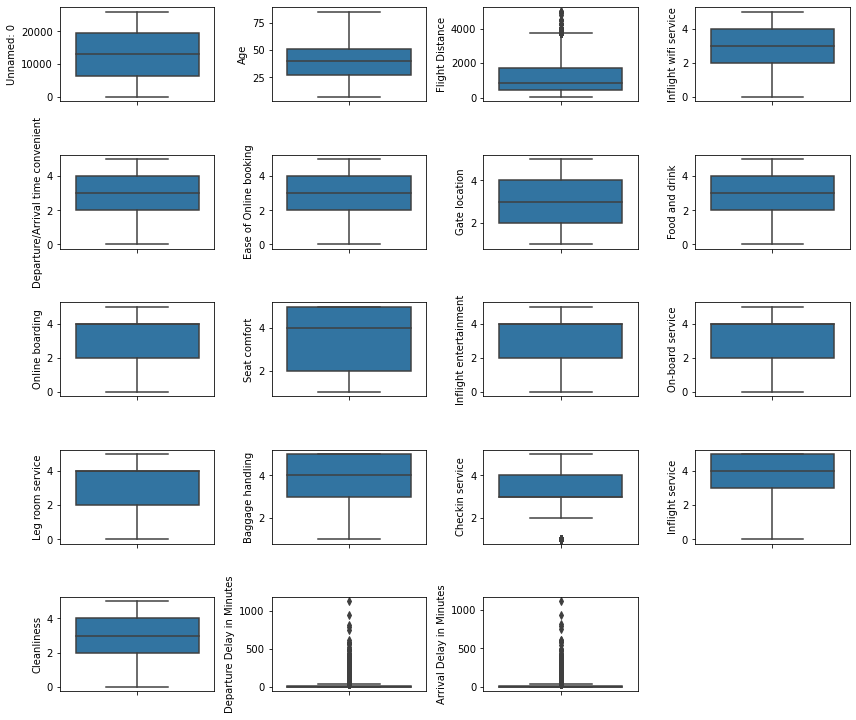

In [161]:
fig = plt.figure(figsize=(12,18))
df_num = df_sat.select_dtypes(include=np.number)
for i in range(len(df_num.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=df_num.iloc[:,i])

plt.tight_layout()
plt.show()

Outlier are present in Departure Delay,Arrival Delay,Chechin Service and Flight Distance.


# Distribution of the numerical variable

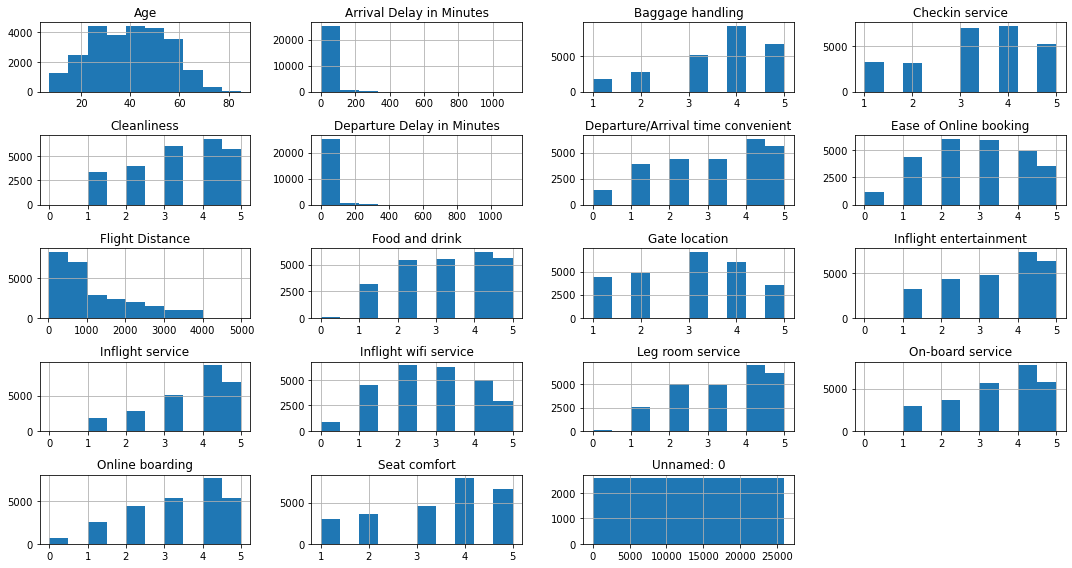

Skewness:


Unnamed: 0                           0.000000
Age                                 -0.000088
Flight Distance                      1.102927
Inflight wifi service                0.040792
Departure/Arrival time convenient   -0.324685
Ease of Online booking              -0.020655
Gate location                       -0.055798
Food and drink                      -0.170229
Online boarding                     -0.469218
Seat comfort                        -0.498047
Inflight entertainment              -0.371353
On-board service                    -0.426507
Leg room service                    -0.341210
Baggage handling                    -0.678863
Checkin service                     -0.373016
Inflight service                    -0.696803
Cleanliness                         -0.304285
Departure Delay in Minutes           7.193970
Arrival Delay in Minutes             6.994086
dtype: float64

In [162]:
df_sat.drop('satisfaction', axis = 1).hist()
plt.tight_layout()
plt.show()  
print('Skewness:')
df_sat.drop('satisfaction', axis = 1).skew()

In [163]:
df_sat.columns

Index(['Unnamed: 0', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

# ENCODING

In [164]:
# Encoding the Categorically variable
df_cat = df_sat.loc[:,['Gender' ,'Customer Type','Type of Travel' ,'Class','satisfaction']]

from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in df_cat.columns:
    lencoders[col] = LabelEncoder()
    df_cat[col] = lencoders[col].fit_transform(df_cat[col])
df_cat

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,0,0,0,1,1
1,0,0,0,0,1
2,1,1,0,1,0
3,1,0,0,0,1
4,0,0,0,1,1
...,...,...,...,...,...
25971,1,1,0,0,0
25972,1,0,0,0,1
25973,0,0,1,1,0
25974,1,0,0,0,1


In [165]:
df3 = df_sat.loc[:,['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']]
df3

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,5,4,3,4,3,4,3,5,5,5,5,2,5,5
1,1,1,3,1,5,4,5,4,4,4,4,3,4,5
2,2,0,2,4,2,2,2,2,4,1,3,2,2,2
3,0,0,0,2,3,4,4,1,1,1,1,3,1,4
4,2,3,4,3,4,1,2,2,2,2,2,4,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,3,3,3,1,4,3,4,4,3,2,4,4,5,4
25972,4,4,4,4,4,4,4,4,4,5,5,5,5,4
25973,2,5,1,5,2,1,2,2,4,3,4,5,4,2
25974,3,3,3,3,4,4,4,4,3,2,5,4,5,4


In [166]:
df_cat1 = pd.concat([df_cat,df3],axis=1)
df_cat1

,Gender,Customer Type,Type of Travel,Class,satisfaction,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,0,0,0,1,1,5,4,3,4,3,4,3,5,5,5,5,2,5,5
1,0,0,0,0,1,1,1,3,1,5,4,5,4,4,4,4,3,4,5
2,1,1,0,1,0,2,0,2,4,2,2,2,2,4,1,3,2,2,2
3,1,0,0,0,1,0,0,0,2,3,4,4,1,1,1,1,3,1,4
4,0,0,0,1,1,2,3,4,3,4,1,2,2,2,2,2,4,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,1,1,0,0,0,3,3,3,1,4,3,4,4,3,2,4,4,5,4
25972,1,0,0,0,1,4,4,4,4,4,4,4,4,4,5,5,5,5,4
25973,0,0,1,1,0,2,5,1,5,2,1,2,2,4,3,4,5,4,2
25974,1,0,0,0,1,3,3,3,3,4,4,4,4,3,2,5,4,5,4


# SCALE DATA

In [167]:
from sklearn.preprocessing import StandardScaler 
Standard_scaler = StandardScaler()
df1 = df_sat.loc[:,['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']]
Standard_scaler.fit(df1)
df_final = pd.DataFrame(Standard_scaler.transform(df1), columns=df1.columns)

# First 5 observation
df_final.head()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,0.817887,-1.035171,0.953810,0.782208
1,-0.239238,1.671443,-0.382286,-0.392188
2,-1.296363,-1.003128,-0.382286,-0.392188
3,0.289325,2.186131,-0.382286,-0.232043
4,0.619676,-0.011804,-0.382286,0.141628


In [168]:
df_final_draft = pd.concat([df_cat1,df_final],axis=1)
df_final_draft

,Gender,Customer Type,Type of Travel,Class,satisfaction,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,0,0,1,1,5,4,3,4,3,...,5,5,5,2,5,5,0.817887,-1.035171,0.953810,0.782208
1,0,0,0,0,1,1,1,3,1,5,...,4,4,4,3,4,5,-0.239238,1.671443,-0.382286,-0.392188
2,1,1,0,1,0,2,0,2,4,2,...,4,1,3,2,2,2,-1.296363,-1.003128,-0.382286,-0.392188
3,1,0,0,0,1,0,0,0,2,3,...,1,1,1,3,1,4,0.289325,2.186131,-0.382286,-0.232043
4,0,0,0,1,1,2,3,4,3,4,...,2,2,2,4,2,4,0.619676,-0.011804,-0.382286,0.141628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,1,1,0,0,0,3,3,3,1,4,...,3,2,4,4,5,4,-0.371378,-0.668681,-0.382286,-0.392188
25972,1,0,0,0,1,4,4,4,4,4,...,4,5,5,5,5,4,-1.098152,-0.548521,-0.382286,-0.392188
25973,0,0,1,1,0,2,5,1,5,2,...,4,3,4,5,4,2,-1.494573,-0.366278,-0.382286,-0.392188
25974,1,0,0,0,1,3,3,3,3,4,...,3,2,5,4,5,4,-1.692784,-0.066878,-0.382286,-0.392188


# Multicollinearity

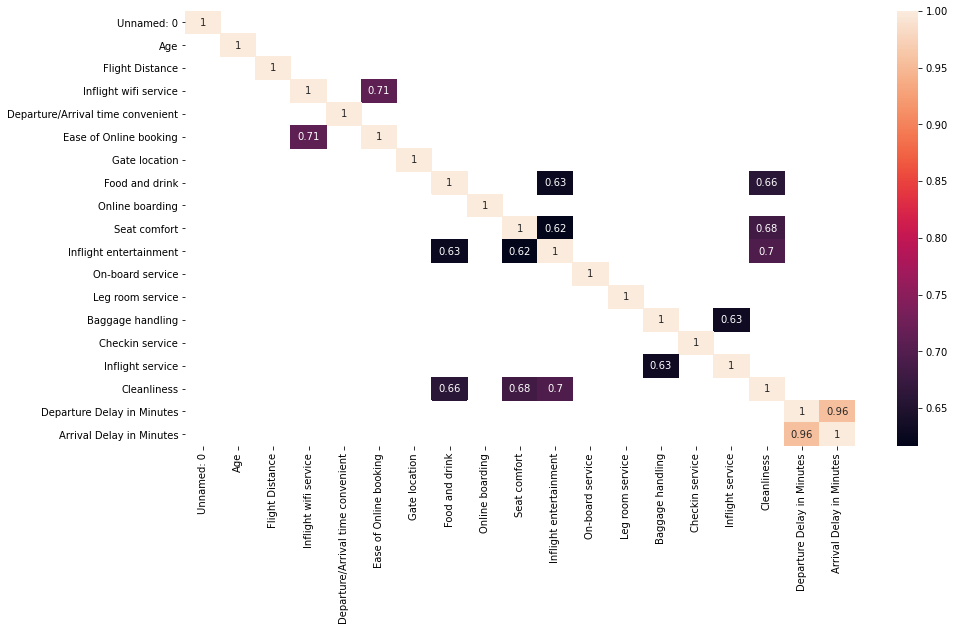

In [169]:
# mutlicollinearity
df = df_sat.drop('satisfaction',axis=1)
sns.heatmap(df.corr()[np.abs(df.corr()>0.6)],annot=True)

#their is correlation between teh variable

# Train-Test split

In [170]:
# train_test_split
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
y =df_final_draft['satisfaction']
df_num_scaled = df_final_draft.drop(['satisfaction'],axis=1)
X = sm.add_constant(df_num_scaled)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 10, test_size = 0.3)

# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (18183, 23)
y_train (18183,)
X_test (7793, 23)
y_test (7793,)


# Logistic Regression-Model 1

In [171]:
log_reg_full = sm.Logit(y_train,X_train).fit()
# summary
print(log_reg_full.summary())

Optimization terminated successfully.
         Current function value: 0.339958
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           satisfaction   No. Observations:                18183
Model:                          Logit   Df Residuals:                    18160
Method:                           MLE   Df Model:                           22
Date:                Thu, 20 May 2021   Pseudo R-squ.:                  0.5039
Time:                        02:46:44   Log-Likelihood:                -6181.5
converged:                       True   LL-Null:                       -12459.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -6.0961      0.159    -38

In [172]:
y_pred_prob = log_reg_full.predict(X_test)
y_pred_prob.head()

13612    0.370539
6799     0.815301
16694    0.068637
25555    0.504765
6021     0.537643
dtype: float64

In [173]:
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]
y_pred[0:5]

[0, 1, 0, 1, 1]

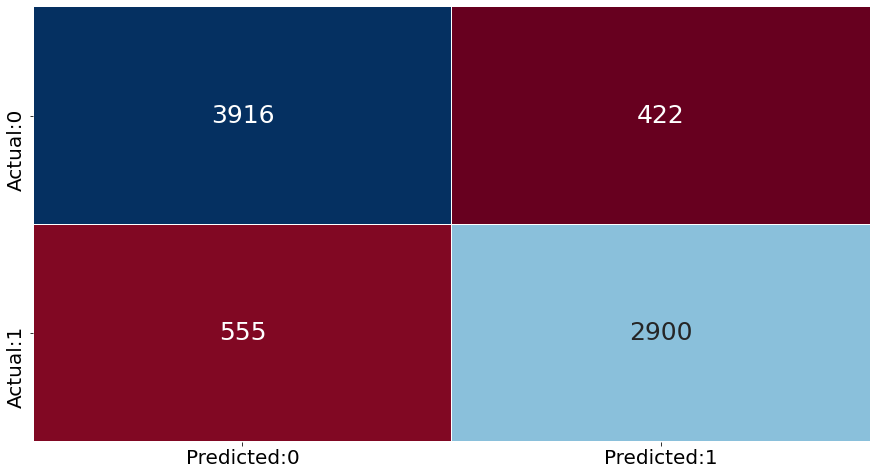

In [174]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'RdBu' , cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [175]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

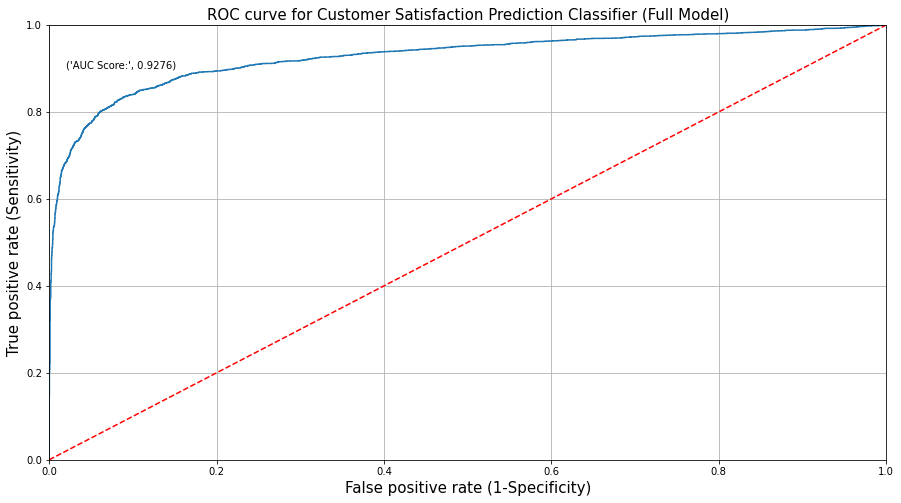

In [176]:
from sklearn import metrics
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Customer Satisfaction Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob),4)))
plt.grid(True)

In [177]:
score_card = pd.DataFrame(columns=['Model_Name','Threshold','AUC Score','Accuracy Score','Precision Score', 'Recall Score', 'Specificity','Kappa Score','FPR','f1-score'])

In [178]:
Precision = TP / (TP+FP)
Recall = TP / (TP+FN)
Specificity = TN / (TN+FP)
f1_score = 2*((Precision*Recall)/(Precision+Recall))
Accuracy = (TN+TP) / (TN+FP+FN+TP)
FPR = 1-Specificity
score = pd.Series({'Model_Name':'SimpleLogisticRegression-(FullModel)','Threshold':0.5,'AUC Score':metrics.roc_auc_score(y_test, y_pred_prob),'Accuracy Score':Accuracy,'Precision Score':Precision,'Recall Score':Recall,'Specificity':Specificity,'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),'FPR':FPR,'f1-score':f1_score})
score_card=score_card.append(score,ignore_index=True)
score_card

,Model_Name,Threshold,AUC Score,Accuracy Score,Precision Score,Recall Score,Specificity,Kappa Score,FPR,f1-score
0,SimpleLogisticRegression-(FullModel),0.5,0.927618,0.874631,0.872968,0.839363,0.90272,0.745002,0.09728,0.855836


# Optimal treshold value

In [179]:
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.834153,0.088520,0.518730,0.745633
1,0.833864,0.088290,0.519098,0.745574
2,0.833864,0.088520,0.519071,0.745344
3,0.834732,0.089442,0.517559,0.745290
4,0.830680,0.085754,0.528390,0.744926


 As we can see that the optimal cut-off probability is approximately 0.5.

# Feature Selection Using Recursive Feature Elimination(RFE) Model-2¶

In [180]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# consider the independent variables (without the intercept term)
X_train_rfe = X_train.iloc[:,1:]
X_test_rfe = X_test.iloc[:,1:]

logreg = LogisticRegression()

rfe_model = RFE(estimator = logreg, n_features_to_select = 12)
rfe_model = rfe_model.fit(X_train_rfe, y_train)

feat_index = pd.Series(data = rfe_model.ranking_, index = X_train_rfe.columns)

signi_feat_rfe = feat_index[feat_index==1].index

# print the significant features obtained from RFE
print(signi_feat_rfe)

Index(['Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service',
       'Ease of Online booking', 'Online boarding', 'On-board service',
       'Leg room service', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Arrival Delay in Minutes'],
      dtype='object')


In [181]:
# train_test_split
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
df_num1 = df_final_draft.loc[:,['Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service',
       'Ease of Online booking', 'Online boarding', 'On-board service',
       'Leg room service', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Arrival Delay in Minutes']]
X = sm.add_constant(df_num1)
y =df_final_draft['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 10, test_size = 0.3)

# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (18183, 13)
y_train (18183,)
X_test (7793, 13)
y_test (7793,)


In [182]:
log_reg_feature = sm.Logit(y_train,X_train).fit()
# summary
print(log_reg_feature.summary())

Optimization terminated successfully.
         Current function value: 0.343411
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           satisfaction   No. Observations:                18183
Model:                          Logit   Df Residuals:                    18170
Method:                           MLE   Df Model:                           12
Date:                Thu, 20 May 2021   Pseudo R-squ.:                  0.4988
Time:                        02:46:52   Log-Likelihood:                -6244.2
converged:                       True   LL-Null:                       -12459.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -6.1076      0.138    -44.100      0.000      -6.379

In [183]:
y_pred_prob = log_reg_feature.predict(X_test)
y_pred_prob.head()

13612    0.340359
6799     0.802520
16694    0.075721
25555    0.515290
6021     0.422703
dtype: float64

In [184]:
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]
y_pred[0:5]

[0, 1, 0, 1, 0]

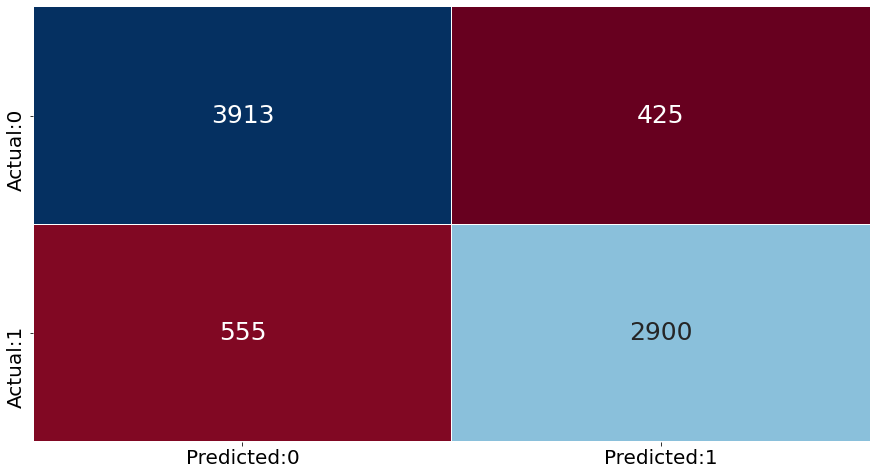

In [185]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'RdBu' , cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

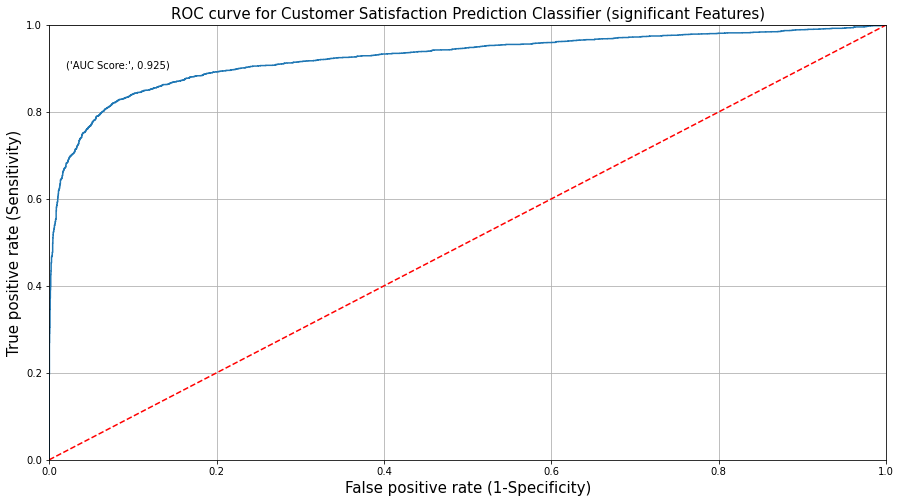

In [186]:
from sklearn import metrics
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Customer Satisfaction Prediction Classifier (significant Features)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob),4)))
plt.grid(True)

In [187]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [188]:
Precision = TP / (TP+FP)
Recall = TP / (TP+FN)
Specificity = TN / (TN+FP)
f1_score = 2*((Precision*Recall)/(Precision+Recall))
Accuracy = (TN+TP) / (TN+FP+FN+TP)
FPR = 1-Specificity
score = pd.Series({'Model_Name':'SimpleLogisticRegressionSelectedFeature','Threshold':0.5,'AUC Score':metrics.roc_auc_score(y_test, y_pred_prob),'Accuracy Score':Accuracy,'Precision Score':Precision,'Recall Score':Recall,'Specificity':Specificity,'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),'FPR':FPR,'f1-score':f1_score})
score_card=score_card.append(score,ignore_index=True)
score_card

,Model_Name,Threshold,AUC Score,Accuracy Score,Precision Score,Recall Score,Specificity,Kappa Score,FPR,f1-score
0,SimpleLogisticRegression-(FullModel),0.5,0.927618,0.874631,0.872968,0.839363,0.902720,0.745002,0.097280,0.855836
1,SimpleLogisticRegressionSelectedFeature,0.5,0.925000,0.874246,0.872180,0.839363,0.902029,0.744242,0.097971,0.855457


# Naive bayes

In [189]:
# train_test_split
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
X = df_final_draft.loc[:,['Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service',
       'Ease of Online booking', 'Online boarding', 'On-board service',
       'Leg room service', 'Checkin service', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes']]

y =df_final_draft['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 10, test_size = 0.3)

# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (18183, 12)
y_train (18183,)
X_test (7793, 12)
y_test (7793,)


In [190]:
# naive_bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb_model = gnb.fit(X_train, y_train)

In [191]:
y_pred = gnb_model.predict(X_test)

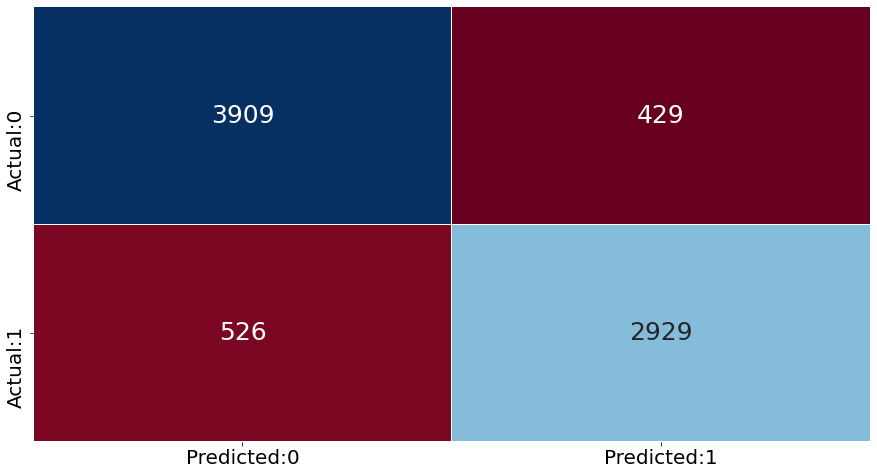

In [192]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'RdBu' , cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

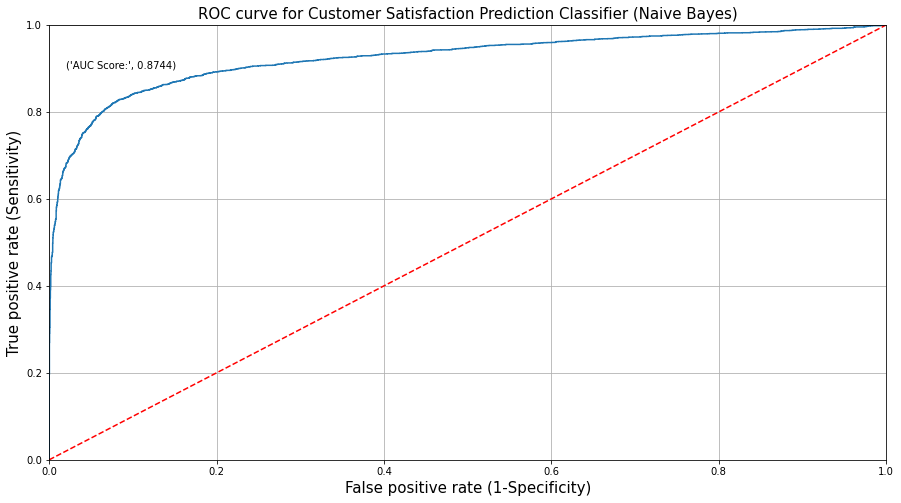

In [193]:
from sklearn import metrics
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Customer Satisfaction Prediction Classifier (Naive Bayes)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred),4)))
plt.grid(True)


In [194]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [195]:
Precision = TP / (TP+FP)
Recall = TP / (TP+FN)
Specificity = TN / (TN+FP)
f1_score = 2*((Precision*Recall)/(Precision+Recall))
Accuracy = (TN+TP) / (TN+FP+FN+TP)
FPR = 1-Specificity
score = pd.Series({'Model_Name':'Navie-Bayes','Threshold':'-','AUC Score':metrics.roc_auc_score(y_test, y_pred),'Accuracy Score':Accuracy,'Precision Score':Precision,'Recall Score':Recall,'Specificity':Specificity,'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),'FPR':FPR,'f1-score':f1_score})
score_card=score_card.append(score,ignore_index=True)
score_card

,Model_Name,Threshold,AUC Score,Accuracy Score,Precision Score,Recall Score,Specificity,Kappa Score,FPR,f1-score
0,SimpleLogisticRegression-(FullModel),0.5,0.927618,0.874631,0.872968,0.839363,0.902720,0.745002,0.097280,0.855836
1,SimpleLogisticRegressionSelectedFeature,0.5,0.925000,0.874246,0.872180,0.839363,0.902029,0.744242,0.097971,0.855457
2,Navie-Bayes,-,0.874432,0.877454,0.872245,0.847757,0.901107,0.751009,0.098893,0.859827


# KNN model

In [196]:
from sklearn.neighbors import KNeighborsClassifier
knn_classification = KNeighborsClassifier(n_neighbors =3)
knn_model = knn_classification.fit(X_train, y_train)

In [197]:
y_pred = knn_model.predict(X_test)

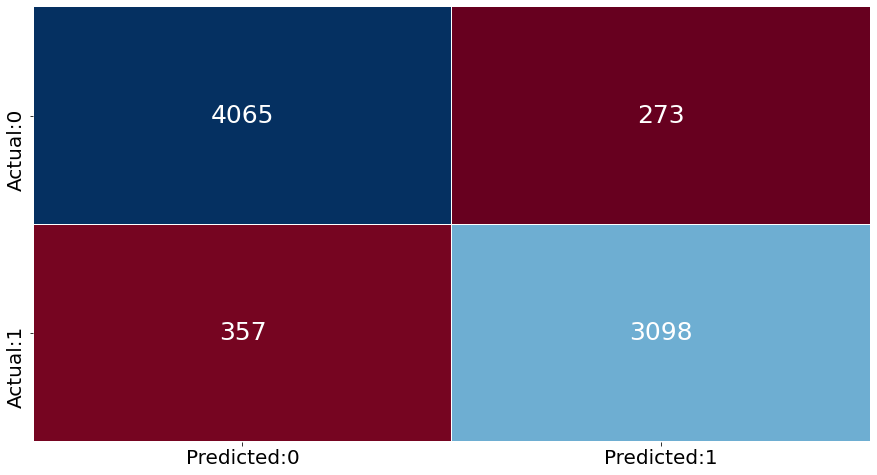

In [198]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'RdBu' , cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

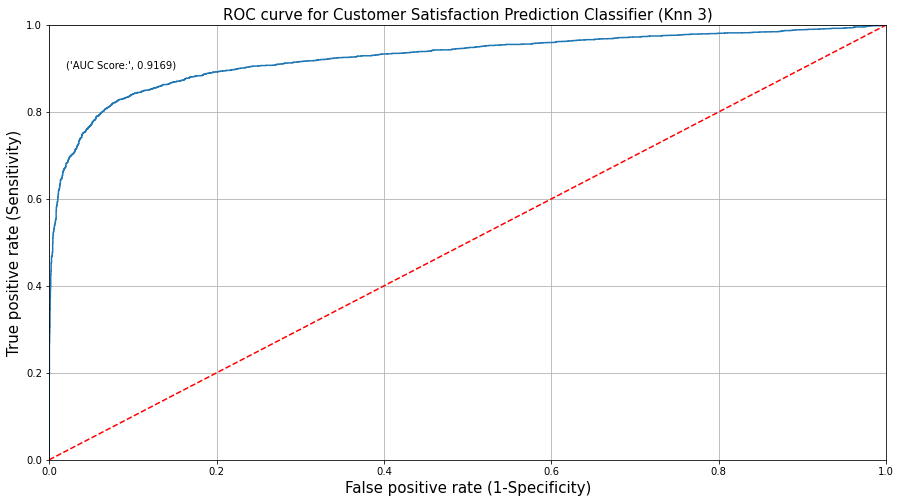

In [199]:
from sklearn import metrics
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Customer Satisfaction Prediction Classifier (Knn 3)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred),4)))
plt.grid(True)

In [200]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [201]:
Precision = TP / (TP+FP)
Recall = TP / (TP+FN)
Specificity = TN / (TN+FP)
f1_score = 2*((Precision*Recall)/(Precision+Recall))
Accuracy = (TN+TP) / (TN+FP+FN+TP)
FPR = 1-Specificity
score = pd.Series({'Model_Name':'KNN(N=3)','Threshold':'-','AUC Score':metrics.roc_auc_score(y_test, y_pred),'Accuracy Score':Accuracy,'Precision Score':Precision,'Recall Score':Recall,'Specificity':Specificity,'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),'FPR':FPR,'f1-score':f1_score})
score_card=score_card.append(score,ignore_index=True)
score_card

,Model_Name,Threshold,AUC Score,Accuracy Score,Precision Score,Recall Score,Specificity,Kappa Score,FPR,f1-score
0,SimpleLogisticRegression-(FullModel),0.5,0.927618,0.874631,0.872968,0.839363,0.902720,0.745002,0.097280,0.855836
1,SimpleLogisticRegressionSelectedFeature,0.5,0.925000,0.874246,0.872180,0.839363,0.902029,0.744242,0.097971,0.855457
2,Navie-Bayes,-,0.874432,0.877454,0.872245,0.847757,0.901107,0.751009,0.098893,0.859827
3,KNN(N=3),-,0.916870,0.919158,0.919015,0.896671,0.937068,0.835807,0.062932,0.907706


# GridSearchCV-Model 5

In [202]:
from sklearn.model_selection import GridSearchCV
tuned_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['euclidean','hamming','manhattan','Chebyshev']}
 
knn_classification = KNeighborsClassifier()
knn_grid = GridSearchCV(estimator = knn_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 5, 
                        scoring = 'accuracy')

knn_grid.fit(X_train, y_train)
print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')

Best parameters for KNN Classifier:  {'metric': 'hamming', 'n_neighbors': 17} 



In [203]:
knn_classification = KNeighborsClassifier(n_neighbors =17,metric='hamming')
knn_model = knn_classification.fit(X_train, y_train)

In [204]:
y_pred = knn_model.predict(X_test)

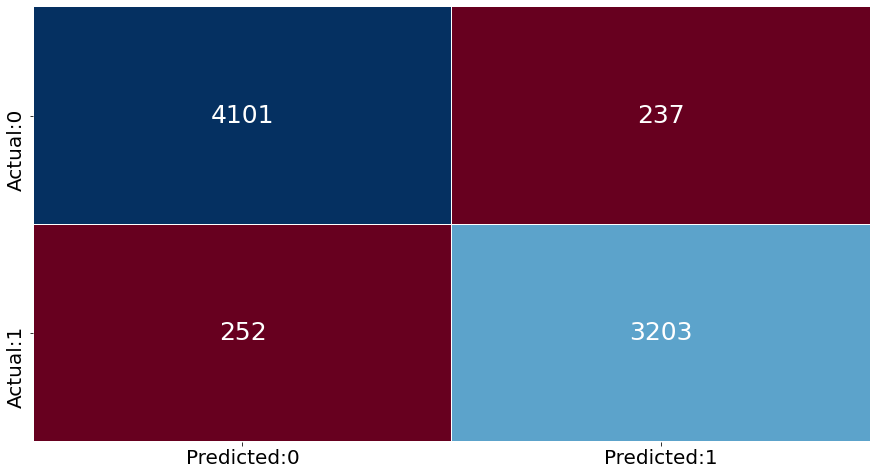

In [205]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'RdBu' , cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

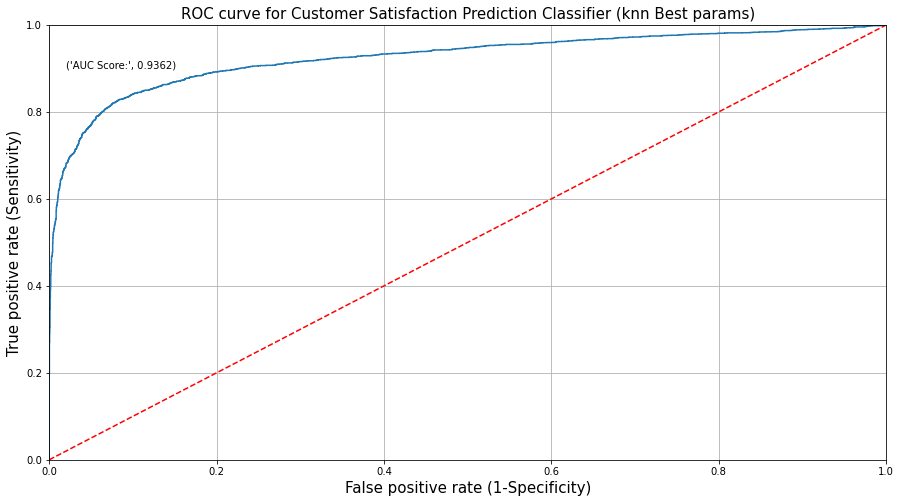

In [206]:
from sklearn import metrics
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Customer Satisfaction Prediction Classifier (knn Best params)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred),4)))
plt.grid(True)


In [207]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [208]:
Precision = TP / (TP+FP)
Recall = TP / (TP+FN)
Specificity = TN / (TN+FP)
f1_score = 2*((Precision*Recall)/(Precision+Recall))
Accuracy = (TN+TP) / (TN+FP+FN+TP)
FPR = 1-Specificity
score = pd.Series({'Model_Name':'KNN(N=17)','Threshold':'-','AUC Score':metrics.roc_auc_score(y_test, y_pred),'Accuracy Score':Accuracy,'Precision Score':Precision,'Recall Score':Recall,'Specificity':Specificity,'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),'FPR':FPR,'f1-score':f1_score})
score_card=score_card.append(score,ignore_index=True)
score_card

,Model_Name,Threshold,AUC Score,Accuracy Score,Precision Score,Recall Score,Specificity,Kappa Score,FPR,f1-score
0,SimpleLogisticRegression-(FullModel),0.5,0.927618,0.874631,0.872968,0.839363,0.902720,0.745002,0.097280,0.855836
1,SimpleLogisticRegressionSelectedFeature,0.5,0.925000,0.874246,0.872180,0.839363,0.902029,0.744242,0.097971,0.855457
2,Navie-Bayes,-,0.874432,0.877454,0.872245,0.847757,0.901107,0.751009,0.098893,0.859827
3,KNN(N=3),-,0.916870,0.919158,0.919015,0.896671,0.937068,0.835807,0.062932,0.907706
4,KNN(N=17),-,0.936214,0.937251,0.931105,0.927062,0.945367,0.872814,0.054633,0.929079


# Decision tree model

In [209]:
def get_train_report(model):
    train_pred = model.predict(X_train)
    return(classification_report(y_train, train_pred))

In [210]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [211]:
decision_tree_classification = DecisionTreeClassifier(criterion = 'gini', random_state = 10)

decision_tree = decision_tree_classification.fit(X_train, y_train)


In [212]:
y_pred = decision_tree.predict(X_test)

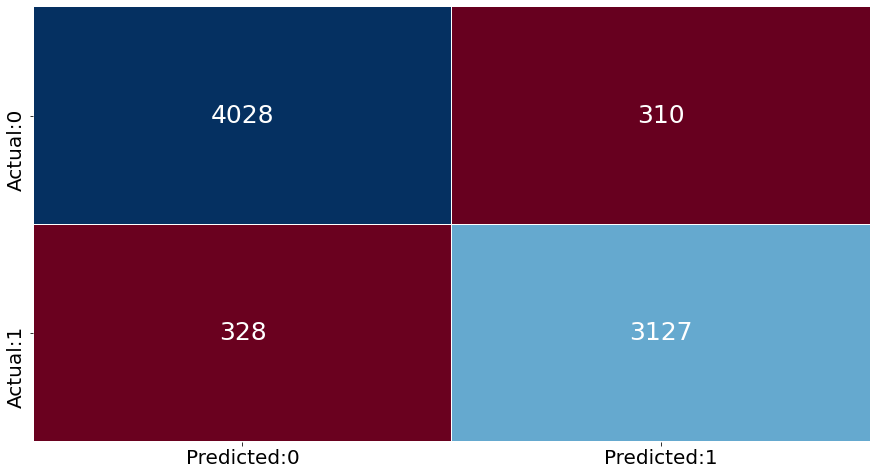

In [213]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'RdBu' , cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [214]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [215]:
Precision = TP / (TP+FP)
Recall = TP / (TP+FN)
Specificity = TN / (TN+FP)
f1_score = 2*((Precision*Recall)/(Precision+Recall))
Accuracy = (TN+TP) / (TN+FP+FN+TP)
FPR = 1-Specificity
score = pd.Series({'Model_Name':'Decision-Tree','Threshold':'-','AUC Score':metrics.roc_auc_score(y_test, y_pred),'Accuracy Score':Accuracy,'Precision Score':Precision,'Recall Score':Recall,'Specificity':Specificity,'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),'FPR':FPR,'f1-score':f1_score})
score_card=score_card.append(score,ignore_index=True)
score_card

,Model_Name,Threshold,AUC Score,Accuracy Score,Precision Score,Recall Score,Specificity,Kappa Score,FPR,f1-score
0,SimpleLogisticRegression-(FullModel),0.5,0.927618,0.874631,0.872968,0.839363,0.902720,0.745002,0.097280,0.855836
1,SimpleLogisticRegressionSelectedFeature,0.5,0.925000,0.874246,0.872180,0.839363,0.902029,0.744242,0.097971,0.855457
2,Navie-Bayes,-,0.874432,0.877454,0.872245,0.847757,0.901107,0.751009,0.098893,0.859827
3,KNN(N=3),-,0.916870,0.919158,0.919015,0.896671,0.937068,0.835807,0.062932,0.907706
4,KNN(N=17),-,0.936214,0.937251,0.931105,0.927062,0.945367,0.872814,0.054633,0.929079
5,Decision-Tree,-,0.916802,0.918132,0.909805,0.905065,0.928538,0.834046,0.071462,0.907429


In [216]:
train_report = get_train_report(decision_tree)
print(train_report)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     10235
           1       1.00      0.99      0.99      7948

    accuracy                           0.99     18183
   macro avg       1.00      0.99      0.99     18183
weighted avg       0.99      0.99      0.99     18183



#There is slight significant difference between the train and test accuracy; thus can conclude that the decision tree is less over-fitted.

# GridSearchDecisionTree Model

In [217]:
# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV


In [218]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 10),
                     'min_samples_split': range(2,10),
                     'min_samples_leaf': range(2,10),
                     'max_leaf_nodes' : range(2,10)
                     }]
 
decision_tree_classification = DecisionTreeClassifier(random_state = 10)


tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

# fit the model on X_train and y_train using fit()
tree_grid_model = tree_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 9, 'min_samples_leaf': 2, 'min_samples_split': 2} 



In [219]:
dt_model = DecisionTreeClassifier(criterion ='gini',
                                  max_depth = 5,
                                  max_leaf_nodes = 9,
                                  min_samples_leaf = 2,
                                  min_samples_split = 2,
                                  random_state = 10)

# use fit() to fit the model on the train set
dt_model = dt_model.fit(X_train, y_train)

[Text(354.11538461538464, 398.64, 'X[5] <= 3.5\ngini = 0.492\nsamples = 18183\nvalue = [10235, 7948]'),
 Text(128.76923076923077, 326.15999999999997, 'X[3] <= 0.5\ngini = 0.263\nsamples = 9065\nvalue = [7653, 1412]'),
 Text(64.38461538461539, 253.67999999999998, 'gini = 0.0\nsamples = 344\nvalue = [0, 344]'),
 Text(193.15384615384616, 253.67999999999998, 'X[3] <= 3.5\ngini = 0.215\nsamples = 8721\nvalue = [7653, 1068]'),
 Text(128.76923076923077, 181.2, 'gini = 0.127\nsamples = 7891\nvalue = [7352, 539]'),
 Text(257.53846153846155, 181.2, 'gini = 0.462\nsamples = 830\nvalue = [301, 529]'),
 Text(579.4615384615385, 326.15999999999997, 'X[1] <= 0.5\ngini = 0.406\nsamples = 9118\nvalue = [2582, 6536]'),
 Text(450.69230769230774, 253.67999999999998, 'X[6] <= 3.5\ngini = 0.26\nsamples = 7259\nvalue = [1114, 6145]'),
 Text(386.3076923076923, 181.2, 'X[5] <= 4.5\ngini = 0.439\nsamples = 2569\nvalue = [836, 1733]'),
 Text(321.9230769230769, 108.71999999999997, 'X[9] <= 3.5\ngini = 0.499\nsampl

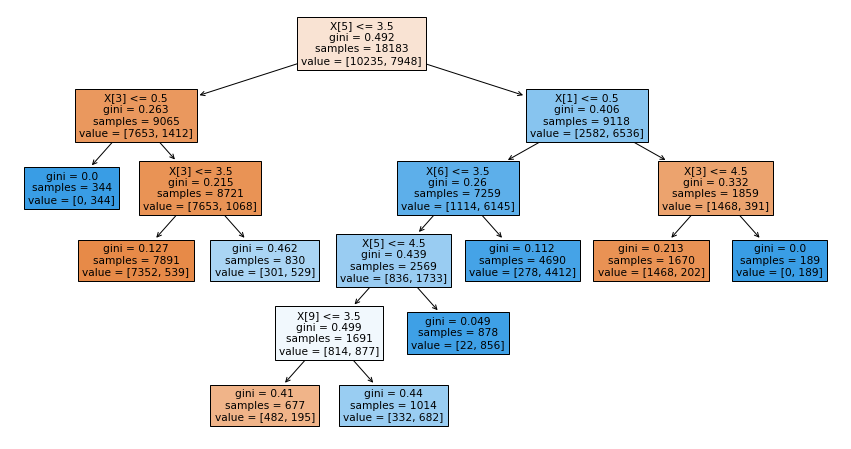

In [220]:
tree.plot_tree(dt_model,filled=True)

In [221]:
train_report = get_train_report(dt_model)
print(train_report)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     10235
           1       0.88      0.88      0.88      7948

    accuracy                           0.90     18183
   macro avg       0.90      0.90      0.90     18183
weighted avg       0.90      0.90      0.90     18183



In [222]:
y_pred = dt_model.predict(X_test)

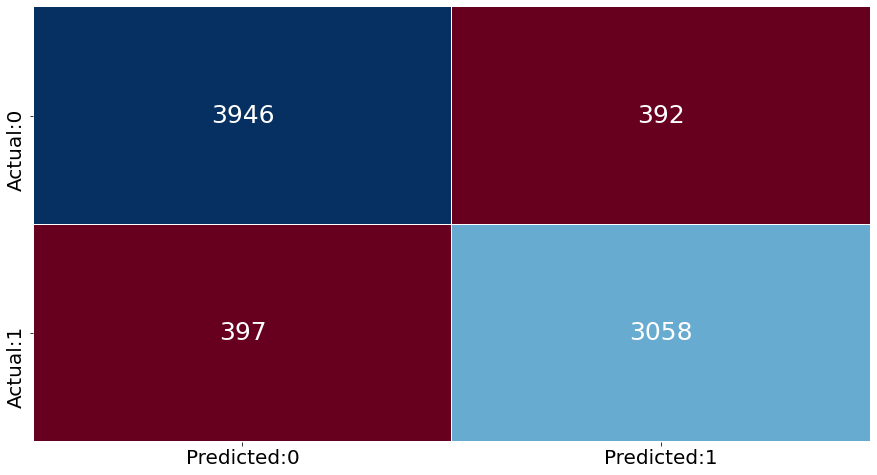

In [223]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'RdBu' , cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()


In [224]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [225]:
Precision = TP / (TP+FP)
Recall = TP / (TP+FN)
Specificity = TN / (TN+FP)
f1_score = 2*((Precision*Recall)/(Precision+Recall))
Accuracy = (TN+TP) / (TN+FP+FN+TP)
FPR = 1-Specificity
score = pd.Series({'Model_Name':'Decision-Tree With Best Params','Threshold':'-','AUC Score':metrics.roc_auc_score(y_test, y_pred),'Accuracy Score':Accuracy,'Precision Score':Precision,'Recall Score':Recall,'Specificity':Specificity,'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),'FPR':FPR,'f1-score':f1_score})
score_card=score_card.append(score,ignore_index=True)
score_card


,Model_Name,Threshold,AUC Score,Accuracy Score,Precision Score,Recall Score,Specificity,Kappa Score,FPR,f1-score
0,SimpleLogisticRegression-(FullModel),0.5,0.927618,0.874631,0.872968,0.839363,0.902720,0.745002,0.097280,0.855836
1,SimpleLogisticRegressionSelectedFeature,0.5,0.925000,0.874246,0.872180,0.839363,0.902029,0.744242,0.097971,0.855457
2,Navie-Bayes,-,0.874432,0.877454,0.872245,0.847757,0.901107,0.751009,0.098893,0.859827
3,KNN(N=3),-,0.916870,0.919158,0.919015,0.896671,0.937068,0.835807,0.062932,0.907706
4,KNN(N=17),-,0.936214,0.937251,0.931105,0.927062,0.945367,0.872814,0.054633,0.929079
5,Decision-Tree,-,0.916802,0.918132,0.909805,0.905065,0.928538,0.834046,0.071462,0.907429
6,Decision-Tree With Best Params,-,0.897365,0.898755,0.886377,0.885094,0.909636,0.794847,0.090364,0.885735


We see test and train data have equal accuracy.


# RandomForest

In [226]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)
rf_model = rf_classification.fit(X_train, y_train)

In [227]:
train_report = get_train_report(rf_classification)
print(train_report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     10235
           1       0.99      0.98      0.99      7948

    accuracy                           0.99     18183
   macro avg       0.99      0.99      0.99     18183
weighted avg       0.99      0.99      0.99     18183



In [228]:
y_pred = rf_classification.predict(X_test)

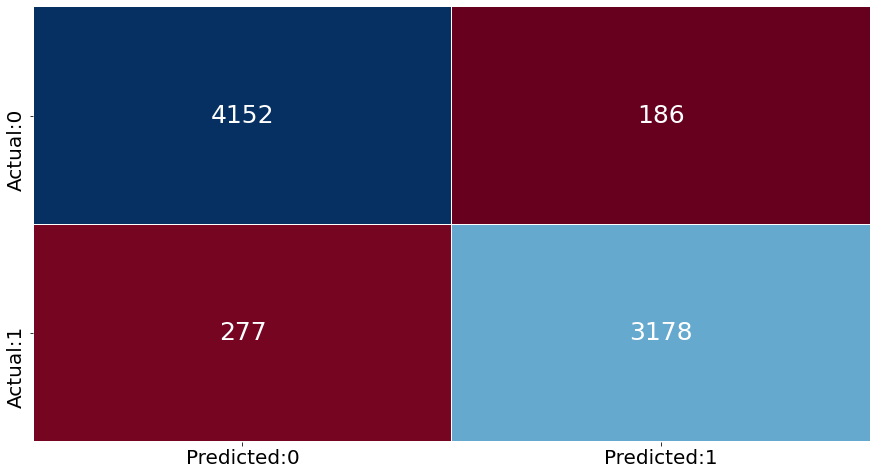

In [229]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'RdBu' , cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [230]:
Precision = TP / (TP+FP)
Recall = TP / (TP+FN)
Specificity = TN / (TN+FP)
f1_score = 2*((Precision*Recall)/(Precision+Recall))
Accuracy = (TN+TP) / (TN+FP+FN+TP)
FPR = 1-Specificity
score = pd.Series({'Model_Name':'RandomForest','Threshold':'-','AUC Score':metrics.roc_auc_score(y_test, y_pred),'Accuracy Score':Accuracy,'Precision Score':Precision,'Recall Score':Recall,'Specificity':Specificity,'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),'FPR':FPR,'f1-score':f1_score})
score_card=score_card.append(score,ignore_index=True)
score_card


,Model_Name,Threshold,AUC Score,Accuracy Score,Precision Score,Recall Score,Specificity,Kappa Score,FPR,f1-score
0,SimpleLogisticRegression-(FullModel),0.5,0.927618,0.874631,0.872968,0.839363,0.902720,0.745002,0.097280,0.855836
1,SimpleLogisticRegressionSelectedFeature,0.5,0.925000,0.874246,0.872180,0.839363,0.902029,0.744242,0.097971,0.855457
2,Navie-Bayes,-,0.874432,0.877454,0.872245,0.847757,0.901107,0.751009,0.098893,0.859827
3,KNN(N=3),-,0.916870,0.919158,0.919015,0.896671,0.937068,0.835807,0.062932,0.907706
4,KNN(N=17),-,0.936214,0.937251,0.931105,0.927062,0.945367,0.872814,0.054633,0.929079
5,Decision-Tree,-,0.916802,0.918132,0.909805,0.905065,0.928538,0.834046,0.071462,0.907429
6,Decision-Tree With Best Params,-,0.897365,0.898755,0.886377,0.885094,0.909636,0.794847,0.090364,0.885735
7,RandomForest,-,0.938475,0.898755,0.886377,0.885094,0.909636,0.879307,0.090364,0.885735


# Grid Search RandomSearch 

In [231]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 30, 50, 70, 90],
                     'max_depth': [10, 15, 20],
                     'min_samples_split': [2, 5, 8, 11],
                     }]
 
random_forest_classification = RandomForestClassifier(random_state = 10)


rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

rf_grid_model = rf_grid.fit(X_train, y_train)

print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 8, 'n_estimators': 70} 



In [232]:
rf_model = RandomForestClassifier(criterion = 'entropy', 
                                  n_estimators = 70,
                                  max_depth = 20,
                                  min_samples_split = 8,
                                  random_state = 10)

# use fit() to fit the model on the train set
rf_model = rf_model.fit(X_train, y_train)

In [233]:
print( get_train_report(rf_model))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     10235
           1       0.98      0.96      0.97      7948

    accuracy                           0.97     18183
   macro avg       0.97      0.97      0.97     18183
weighted avg       0.97      0.97      0.97     18183



In [234]:
y_pred = rf_model.predict(X_test)


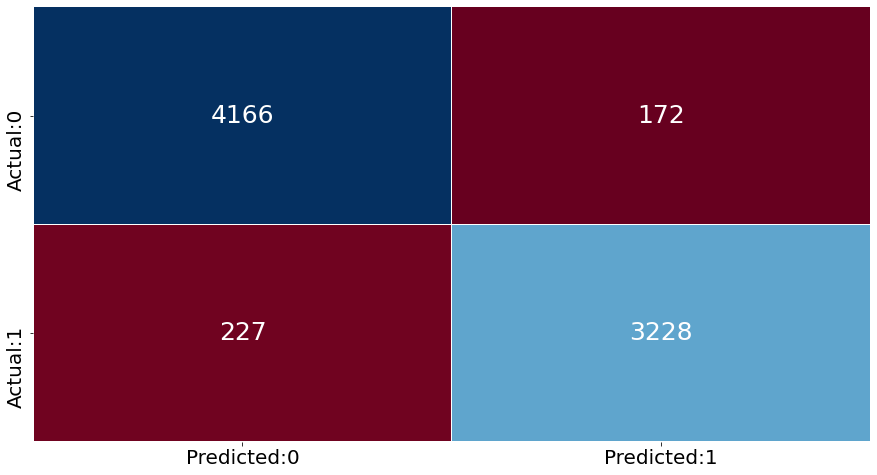

In [235]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'RdBu' , cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [236]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [237]:
Precision = TP / (TP+FP)
Recall = TP / (TP+FN)
Specificity = TN / (TN+FP)
f1_score = 2*((Precision*Recall)/(Precision+Recall))
Accuracy = (TN+TP) / (TN+FP+FN+TP)
FPR = 1-Specificity
score = pd.Series({'Model_Name':'RandomForest With Best Params','Threshold':'-','AUC Score':metrics.roc_auc_score(y_test, y_pred),'Accuracy Score':Accuracy,'Precision Score':Precision,'Recall Score':Recall,'Specificity':Specificity,'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),'FPR':FPR,'f1-score':f1_score})
score_card=score_card.append(score,ignore_index=True)
score_card

,Model_Name,Threshold,AUC Score,Accuracy Score,Precision Score,Recall Score,Specificity,Kappa Score,FPR,f1-score
0,SimpleLogisticRegression-(FullModel),0.5,0.927618,0.874631,0.872968,0.839363,0.902720,0.745002,0.097280,0.855836
1,SimpleLogisticRegressionSelectedFeature,0.5,0.925000,0.874246,0.872180,0.839363,0.902029,0.744242,0.097971,0.855457
2,Navie-Bayes,-,0.874432,0.877454,0.872245,0.847757,0.901107,0.751009,0.098893,0.859827
3,KNN(N=3),-,0.916870,0.919158,0.919015,0.896671,0.937068,0.835807,0.062932,0.907706
4,KNN(N=17),-,0.936214,0.937251,0.931105,0.927062,0.945367,0.872814,0.054633,0.929079
5,Decision-Tree,-,0.916802,0.918132,0.909805,0.905065,0.928538,0.834046,0.071462,0.907429
6,Decision-Tree With Best Params,-,0.897365,0.898755,0.886377,0.885094,0.909636,0.794847,0.090364,0.885735
7,RandomForest,-,0.938475,0.898755,0.886377,0.885094,0.909636,0.879307,0.090364,0.885735
8,RandomForest With Best Params,-,0.947324,0.948800,0.949412,0.934298,0.960350,0.896100,0.039650,0.941794


# AdaBoost Model 

In [238]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)
ada_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=40, random_state=10)

In [239]:
y_pred = ada_model.predict(X_test)

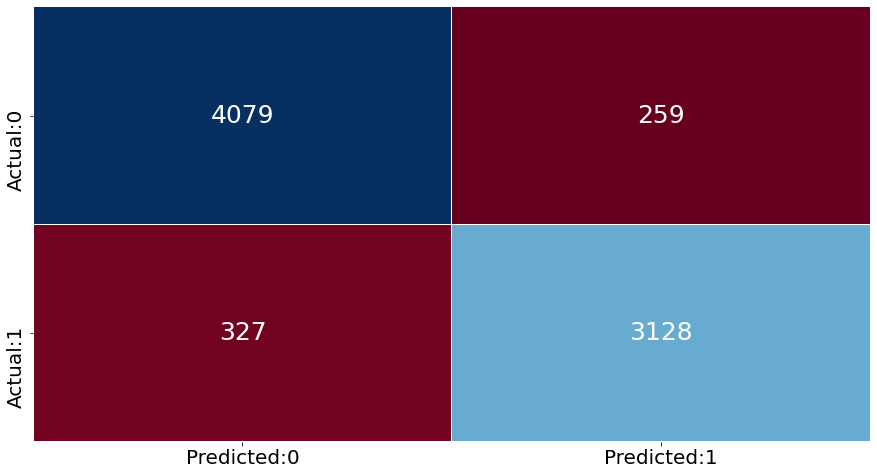

In [240]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'RdBu' , cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [241]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [242]:
Precision = TP / (TP+FP)
Recall = TP / (TP+FN)
Specificity = TN / (TN+FP)
f1_score = 2*((Precision*Recall)/(Precision+Recall))
Accuracy = (TN+TP) / (TN+FP+FN+TP)
FPR = 1-Specificity
score = pd.Series({'Model_Name':'AdaBoost','Threshold':'-','AUC Score':metrics.roc_auc_score(y_test, y_pred),'Accuracy Score':Accuracy,'Precision Score':Precision,'Recall Score':Recall,'Specificity':Specificity,'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),'FPR':FPR,'f1-score':f1_score})
score_card=score_card.append(score,ignore_index=True)
score_card

,Model_Name,Threshold,AUC Score,Accuracy Score,Precision Score,Recall Score,Specificity,Kappa Score,FPR,f1-score
0,SimpleLogisticRegression-(FullModel),0.5,0.927618,0.874631,0.872968,0.839363,0.902720,0.745002,0.097280,0.855836
1,SimpleLogisticRegressionSelectedFeature,0.5,0.925000,0.874246,0.872180,0.839363,0.902029,0.744242,0.097971,0.855457
2,Navie-Bayes,-,0.874432,0.877454,0.872245,0.847757,0.901107,0.751009,0.098893,0.859827
3,KNN(N=3),-,0.916870,0.919158,0.919015,0.896671,0.937068,0.835807,0.062932,0.907706
4,KNN(N=17),-,0.936214,0.937251,0.931105,0.927062,0.945367,0.872814,0.054633,0.929079
5,Decision-Tree,-,0.916802,0.918132,0.909805,0.905065,0.928538,0.834046,0.071462,0.907429
6,Decision-Tree With Best Params,-,0.897365,0.898755,0.886377,0.885094,0.909636,0.794847,0.090364,0.885735
7,RandomForest,-,0.938475,0.898755,0.886377,0.885094,0.909636,0.879307,0.090364,0.885735
8,RandomForest With Best Params,-,0.947324,0.948800,0.949412,0.934298,0.960350,0.896100,0.039650,0.941794
9,AdaBoost,-,0.922825,0.924804,0.923531,0.905355,0.940295,0.847347,0.059705,0.914353


# XGBoost Model with tuned Params

In [243]:
from xgboost import XGBClassifier
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}


xgb_model = XGBClassifier()
xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')

xgb_grid.fit(X_train, y_train)

print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

ModuleNotFoundError: No module named 'xgboost'

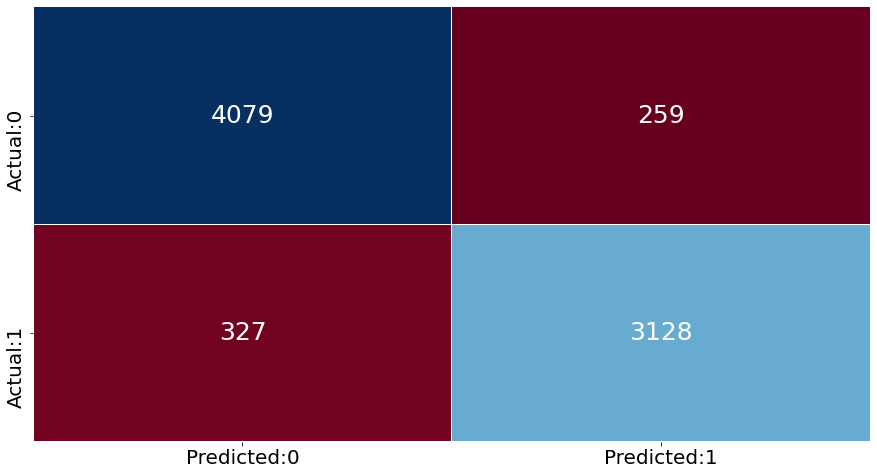

In [246]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'RdBu' , cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [247]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [248]:
Precision = TP / (TP+FP)
Recall = TP / (TP+FN)
Specificity = TN / (TN+FP)
f1_score = 2*((Precision*Recall)/(Precision+Recall))
Accuracy = (TN+TP) / (TN+FP+FN+TP)
FPR = 1-Specificity
score = pd.Series({'Model_Name':'XGBoost-TunedParams','Threshold':'-','AUC Score':metrics.roc_auc_score(y_test, y_pred),'Accuracy Score':Accuracy,'Precision Score':Precision,'Recall Score':Recall,'Specificity':Specificity,'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),'FPR':FPR,'f1-score':f1_score})
score_card=score_card.append(score,ignore_index=True)
score_card


,Model_Name,Threshold,AUC Score,Accuracy Score,Precision Score,Recall Score,Specificity,Kappa Score,FPR,f1-score
0,SimpleLogisticRegression-(FullModel),0.5,0.927618,0.874631,0.872968,0.839363,0.902720,0.745002,0.097280,0.855836
1,SimpleLogisticRegressionSelectedFeature,0.5,0.925000,0.874246,0.872180,0.839363,0.902029,0.744242,0.097971,0.855457
2,Navie-Bayes,-,0.874432,0.877454,0.872245,0.847757,0.901107,0.751009,0.098893,0.859827
3,KNN(N=3),-,0.916870,0.919158,0.919015,0.896671,0.937068,0.835807,0.062932,0.907706
4,KNN(N=17),-,0.936214,0.937251,0.931105,0.927062,0.945367,0.872814,0.054633,0.929079
5,Decision-Tree,-,0.916802,0.918132,0.909805,0.905065,0.928538,0.834046,0.071462,0.907429
6,Decision-Tree With Best Params,-,0.897365,0.898755,0.886377,0.885094,0.909636,0.794847,0.090364,0.885735
7,RandomForest,-,0.938475,0.898755,0.886377,0.885094,0.909636,0.879307,0.090364,0.885735
8,RandomForest With Best Params,-,0.947324,0.948800,0.949412,0.934298,0.960350,0.896100,0.039650,0.941794
9,AdaBoost,-,0.922825,0.924804,0.923531,0.905355,0.940295,0.847347,0.059705,0.914353


# THANK-YOU